<a href="https://colab.research.google.com/github/lmcanavals/acomplex/blob/main/1302_ford_fulkerson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/lmcanavals/acomplex.git

fatal: destination path 'acomplex' already exists and is not an empty directory.


In [2]:
from acomplex import graphstuff as gs
import math
import numpy as np

In [3]:
def dfs(G, u, t, visited):
    visited[u] = True
    if u == t:
        return [u], math.inf
    else:
        n = len(G)
        for v in range(n):
            if G[u, v] > 0 and not visited[v]:
                path, mid = dfs(G, v, t, visited)
                if path != None:
                    return [u] + path, mid if mid < G[u, v] else G[u, v]
        return None, 0

In [4]:
def fordFulkerson(G, s, t):
    n = len(G)
    Gres = np.zeros((n, n))
    for u in range(n):
        for v, w in G[u]:
            Gres[u, v] = w
    Gflow = np.zeros((n, n))
    while True:
        path, bottleneck = dfs(Gres, s, t, [False]*n)

        if path != None:
            for i in range(1, len(path)):
                u = path[i - 1]
                v = path[i]
                Gres[u, v] -= bottleneck
                Gres[v, u] += bottleneck
                Gflow[u, v] = Gflow[u, v] + bottleneck
        else:
            break

    return Gflow, np.sum(Gflow[s])

```
s 0
a 1 
b 2
c 3
d 4
t 5
```

In [5]:
%%file 1302a.al
1 16 3 13
2 12 3 10
3 9 5 20
1 4 4 14
2 7 5 4
-


Overwriting 1302a.al


In [6]:
G = gs.loadGraphAL("1302a.al")

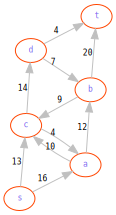

In [7]:
gs.adjlShow(G, "sabcdt", directed=True, weighted=True, layout="neato")

In [8]:
Gres, mf = fordFulkerson(G, 0, 5)

In [9]:
n = len(Gres)
G2 = [[(v, Gres[u, v]) for v in range(n) if Gres[u, v] > 0] for u in range(n)]
G2

[[(1, 16.0), (3, 7.0)],
 [(2, 12.0), (3, 4.0)],
 [(3, 4.0), (5, 19.0)],
 [(2, 4.0), (4, 11.0)],
 [(2, 7.0), (5, 4.0)],
 []]

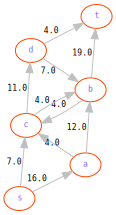

In [10]:
gs.adjlShow(G2, "sabcdt", directed=True, weighted=True, layout="neato")